# ACME: Pandas 2
## Jincheng(Eric) Huang

1. The `pydataset` module contains numerous data sets, each stored as a pandas `DataFrame`. Visualize and describe at least 5 of the following data sets with 2 or 3 figures each. Comment on the implications and significance of each visualization and give a comprehensive summary of the data set.

    • "Arbuthnot": Ratios of male to female births in London from 1629-1710
    
    • "trees": Girth, height and volume for black cherry trees
    
    • "road": Road accident deaths in the United States
    
    • "birthdeathrates": Birth and death rates by country
    
    • "bfeed": Child breast feeding records
    
    • "heart": Survival of patients on the waiting list for the Stanford heart transplant program
    
    • "lung": Survival in patients with advanced lung cancer from the North Central Cancer Treatment group
    
    • "birthwt": Risk factors associated with low infant birth weight
    
    • A data set of your choice
    
    Include each of the following in each visualization.
    
    • A clear title, with relevant information for the period or region the data was collected in.
    
    • Axis labels that specify units.
    
    • A legend (if appropriate).
    
    • The source. You may include the source information in your plot or print it after the plot.

In [1]:
#pip install pydataset

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pydataset import data

### Data set 1: Birth and death rates by country

In [3]:
birthdeathrates = data("birthdeathrates")
birthdeathrates.head()

,birth,death
alg,36.4,14.6
con,37.3,8.0
egy,42.1,15.3
gha,55.8,25.6
ict,56.1,33.1


The figure below shows the histograms of birth and death rates across countries. Each histogram consists of 10 bins, and the height of each bin equals the number of countries within the bin.

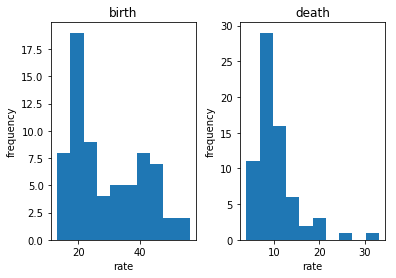

In [4]:
# 1.1: Histogram of birth and death rates across countries
bdhist = birthdeathrates.hist(grid=False, bins=10)
for ax in bdhist.flatten():
    ax.set_xlabel("rate")
    ax.set_ylabel("frequency")

The figure below shows the scatter plot of birth rates against death rates. Each dot represents one country.

Text(0, 0.5, 'death rate')

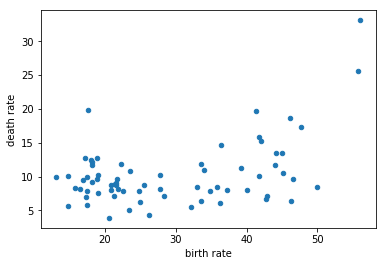

In [5]:
bdscatter = birthdeathrates.plot(kind="scatter", x="birth", y="death")
bdscatter.set_xlabel('birth rate')
bdscatter.set_ylabel('death rate')

### Data set 2: Ratios of male to female births in London from 1629-1710

In [6]:
Arbuthnot = data("Arbuthnot")
Arbuthnot.head()

,Year,Males,Females,Plague,Mortality,Ratio,Total
1,1629,5218,4683,0,8771,1.114243,9.901
2,1630,4858,4457,1317,10554,1.089971,9.315
3,1631,4422,4102,274,8562,1.078011,8.524
4,1632,4994,4590,8,9535,1.088017,9.584
5,1633,5158,4839,0,8393,1.065923,9.997


The figure below shows the male and female birth rates in London from 1629 to 1710.

Text(0.5, 1.0, 'Male and Female Birth Rate')

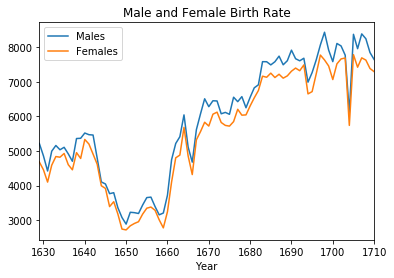

In [7]:
Arbuthnot.index = Arbuthnot["Year"]
birth_rates = Arbuthnot[['Males','Females']].plot()
birth_rates.set_title('Male and Female Birth Rate')

The figure below shows the mortality rates and population with plague in London from 1629 to 1710. The shaded areas indicate occurrences of major plagues, defined by years in which more than 1500 died due to plagues.

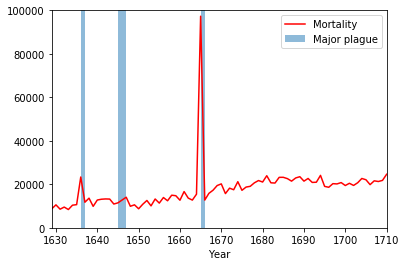

In [8]:
ax = Arbuthnot['Mortality'].plot(color='r')
plague = Arbuthnot.Plague
mortality = Arbuthnot.Mortality

# Create shaded areas indicator major plagues
ax.fill_between(Arbuthnot.Year,0,1e5,where=(plague>1500), alpha=0.5,label='Major plague')
ax.set_ylim([0,1e5])
ax.legend()

### Data set 3: Risk factors associated with low infant birth weight

In [9]:
birthwt = data("birthwt")
birthwt.head()

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
85,0,19,182,2,0,0,0,1,0,2523
86,0,33,155,3,0,0,0,0,3,2551
87,0,20,105,1,1,0,0,0,1,2557
88,0,21,108,1,1,0,0,1,2,2594
89,0,18,107,1,1,0,0,1,0,2600


The figure below shows a box and whisker plot of birth weight against whether mother smoked during pregnancy. 

Text(0, 0.5, 'Birth weight')

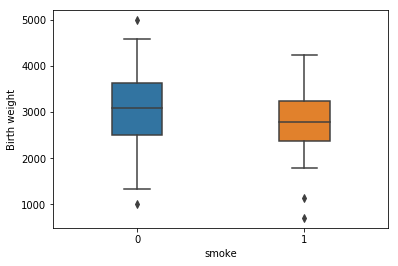

In [10]:
import seaborn as sns
birthbox = sns.boxplot(x=birthwt.smoke,y=birthwt.bwt,data=birthwt,width=.3,whis=1.2)
birthbox.set_ylabel('Birth weight')

The figure below shows the box and whisker plot of mother's age when giving birth against race. 1 is white, 2 is black and 3 is others.

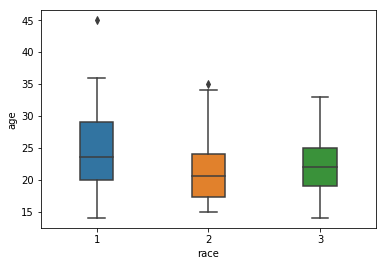

In [11]:
birthhist = sns.boxplot(x=birthwt.race,y=birthwt.age,data=birthwt,width=.3)